In [42]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width to display everything
pd.set_option('display.max_colwidth', None)  # Show full column content

import matplotlib.pyplot as plt

from textblob import TextBlob

from wordcloud import WordCloud , STOPWORDS

import emoji

from collections import Counter

In [2]:
twitter_df = pd.read_csv(r"C:\Users\User\iCloudDrive\Cursos\Data Circle\DataCircle_Twitter_Project\twitter_cleaned_data.csv")

In [3]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014005 entries, 0 to 1014004
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   created_at            1014005 non-null  object
 1   tweet_id              1014005 non-null  int64 
 2   tweet                 1014005 non-null  object
 3   likes                 1014005 non-null  int64 
 4   retweet_count         1014005 non-null  int64 
 5   source                1014002 non-null  object
 6   user_id               1014005 non-null  int64 
 7   user_join_date        1014005 non-null  object
 8   user_followers_count  1014005 non-null  int64 
 9   user_location         1009904 non-null  object
 10  city                  1014005 non-null  object
 11  state                 1014005 non-null  object
 12  candidate             1014005 non-null  object
 13  tweet_cleaned         1014005 non-null  object
 14  country               1014005 non-null  object
dty

In [4]:
twitter_df["created_at"] = pd.to_datetime(twitter_df["created_at"])

# Sentiment and WordCloud Analysis

In [14]:
# Create a 'polarity' column to do sentiment analysis
polarity_cleaned = []

for tweet in twitter_df['tweet_cleaned']:
    try:
        polarity_cleaned.append(TextBlob(tweet).sentiment.polarity)
    except:
        polarity_cleaned.append(0)

In [15]:
twitter_df['polarity_cleaned'] = polarity_cleaned

In [24]:
twitter_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,city,state,candidate,tweet_cleaned,country,polarity,polarity_cleaned
0,2020-10-15 00:00:02,1316529228091846912,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",2,1,twitter web app,8436472,2007-08-26 05:56:11,1185,portland,portland,oregon,trump,#trump student used hear years ten years heard china 2019 15 dont know many asked many said sir dont know millions like 300 million um,united states,0.333333,0.333333
1,2020-10-15 00:00:02,1316529227471237120,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,0,0,trumpytweeter,828355589206056960,2017-02-05 21:32:17,32,unknown,unknown,unknown,trump,2 hours since last tweet #trump maybe busy tremendously busy,unknown,0.076667,0.066667
2,2020-10-15 00:00:08,1316529252301451264,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,4,3,twitter for iphone,47413798,2009-06-15 19:05:35,5393,washington dc,washington,district of columbia,trump,get tie get tie #trump rally #iowa,united states,0.000000,0.000000
3,2020-10-15 00:00:17,1316529291052675072,@CLady62 Her 15 minutes were over long time ago. Omarosa never represented the black community! #TheReidOut \n\nShe cried to #Trump begging for a job!,2,0,twitter for android,1138416104,2013-02-01 01:37:38,2363,perriscalifornia,unknown,california,trump,clady62 15 minutes long time ago omarosa never represented black community #thereidout cried #trump begging job,united states,-0.155208,-0.108333
4,2020-10-15 00:00:17,1316529289949569024,@richardmarx Glad u got out of the house! DICK!!#trump 2020💪🏽🇺🇸🇺🇸,0,0,twitter for iphone,767401841030209536,2016-08-21 16:43:51,75,powell tn,unknown,unknown,trump,richardmarx glad u got house dick#trump 2020,unknown,0.625000,0.500000


In [21]:
twitter_df['polarity_cleaned'].describe()

count    1.014005e+06
mean     5.504257e-02
std      2.775036e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e-01
max      1.000000e+00
Name: polarity_cleaned, dtype: float64

In [17]:
positive_twits_cleaned = twitter_df[twitter_df['polarity_cleaned']==1]

In [26]:
positive_twits_cleaned

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,city,state,candidate,tweet_cleaned,country,polarity,polarity_cleaned
173,2020-10-15 00:11:02,1316531997980811264,Via @RawStory: It’s been one faceplant after another as Trump and the GOP try to recreate 2016’s perfect storm https://t.co/4NSju3ipQw | #politics #trump #corruption,0,1,dlvrit,15182798,2008-06-20 18:32:27,6614,new york city,new york,new york,trump,via rawstory one faceplant another trump gop try recreate 2016s perfect storm #politics #trump #corruption,united states,1.0,1.0
346,2020-10-15 00:25:07,1316535542272741376,How awesome! My TwitterVersary! #trump2020 #trump https://t.co/lxD1ar0wDA,0,0,twitter for iphone,1049096192599187584,2018-10-08 00:36:38,195,portugal,unknown,unknown,trump,awesome twitterversary #trump2020 #trump,portugal,1.0,1.0
438,2020-10-15 00:31:37,1316537175383523328,Excellent. Show him the door.\n\n#cdnpoli #abpoli #uspoli #trump https://t.co/QxVnvfZAhJ,0,0,twitter for iphone,335704578,2011-07-15 03:12:04,374,st albert alberta canada,unknown,alberta,trump,excellent show door #cdnpoli #abpoli #uspoli #trump,canada,1.0,1.0
522,2020-10-15 00:39:38,1316539191799557888,@realDonaldTrump Another “best people” from #Trump.\n#AmyConeyBarrett \n@GOP @senatemajldr https://t.co/w5yAp6iARw,0,0,twitter web app,1225412988699582464,2020-02-06 13:37:08,9,unknown,unknown,unknown,trump,realdonaldtrump another best people #trump #amyconeybarrett gop senatemajldr,unknown,1.0,1.0
578,2020-10-15 00:44:54,1316540519808409600,Mummy always knows best.. \n#trump #TrumpCovid19 #USPolitics https://t.co/kItEUMVtu4,0,0,twitter for android,1229070112721952768,2020-02-16 15:48:54,304,bedfordshire united kingdom,unknown,england,trump,mummy always knows best #trump #trumpcovid19 #uspolitics,united kingdom,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012776,2020-11-08 21:10:47,1325546333252546560,Best thing to happen in 2020. Search 'loser' on Twitter. 😂😂 #TrumpCollapse #Biden https://t.co/rwTJqysPkD,4,0,twitter for iphone,3294441656,2015-07-26 05:31:33,1661,unknown,unknown,unknown,biden,best thing happen 2020 search loser twitter #trumpcollapse #biden,unknown,1.0,1.0
1012901,2020-11-08 21:20:34,1325548793366933504,One of the best lines in #PresidentElectJoe #Biden speech. https://t.co/J8OKCQjyGK,1,0,twitter web app,1183231331905359872,2019-10-13 04:02:02,80,salt lake city utah,salt lake city,utah,biden,one best lines #presidentelectjoe #biden speech,united states,1.0,1.0
1012938,2020-11-08 21:23:18,1325549483090989056,@DWUhlfelderLaw @patcrit A truly wonderful comedy ! #trumpexit #TrumpOut #Biden #BidenHarrisToSaveAmerica #BidenHarrisToEndThisNightmare #BidenHarris2020 #AmericaDecides #America #UnitedStates #comedy,0,0,twitter web app,933364462769332224,2017-11-22 16:00:03,85,leidschendam,unknown,unknown,biden,dwuhlfelderlaw patcrit truly wonderful comedy #trumpexit #trumpout #biden #bidenharristosaveamerica #bidenharristoendthisnightmare #bidenharris2020 #americadecides #america #unitedstates #comedy,unknown,1.0,1.0
1013004,2020-11-08 21:29:53,1325551139505528832,"This is the best explanation of why #TrumpOut (of luck at the) #SupremeCourt \n\n#DemCast. \n\n#Biden time on #TikTok ... before #TickTock , DJT https://t.co/LoWkqW05D4",2,0,twitter for android,49814519,2009-06-22 23:49:42,5716,carrboro nc,unknown,north carolina,biden,best explanation #trumpout luck #supremecourt #demcast #biden time #tiktok #ticktock djt,united states,1.0,1.0


In [6]:
polarity = []

for tweet in twitter_df['tweet']:
    try:
        polarity.append(TextBlob(tweet).sentiment.polarity)
    except:
        polarity.append(0)

In [7]:
len(polarity)

1014005

In [8]:
twitter_df['polarity'] = polarity

In [10]:
twitter_df.head(5)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,city,state,candidate,tweet_cleaned,country,polarity
0,2020-10-15 00:00:02,1316529228091846912,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",2,1,twitter web app,8436472,2007-08-26 05:56:11,1185,portland,portland,oregon,trump,#trump student used hear years ten years heard china 2019 15 dont know many asked many said sir dont know millions like 300 million um,united states,0.333333
1,2020-10-15 00:00:02,1316529227471237120,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,0,0,trumpytweeter,828355589206056960,2017-02-05 21:32:17,32,unknown,unknown,unknown,trump,2 hours since last tweet #trump maybe busy tremendously busy,unknown,0.076667
2,2020-10-15 00:00:08,1316529252301451264,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,4,3,twitter for iphone,47413798,2009-06-15 19:05:35,5393,washington dc,washington,district of columbia,trump,get tie get tie #trump rally #iowa,united states,0.000000
3,2020-10-15 00:00:17,1316529291052675072,@CLady62 Her 15 minutes were over long time ago. Omarosa never represented the black community! #TheReidOut \n\nShe cried to #Trump begging for a job!,2,0,twitter for android,1138416104,2013-02-01 01:37:38,2363,perriscalifornia,unknown,california,trump,clady62 15 minutes long time ago omarosa never represented black community #thereidout cried #trump begging job,united states,-0.155208
4,2020-10-15 00:00:17,1316529289949569024,@richardmarx Glad u got out of the house! DICK!!#trump 2020💪🏽🇺🇸🇺🇸,0,0,twitter for iphone,767401841030209536,2016-08-21 16:43:51,75,powell tn,unknown,unknown,trump,richardmarx glad u got house dick#trump 2020,unknown,0.625000


In [12]:
positive_twits = twitter_df[twitter_df['polarity']==1]

In [13]:
positive_twits

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,city,state,candidate,tweet_cleaned,country,polarity
173,2020-10-15 00:11:02,1316531997980811264,Via @RawStory: It’s been one faceplant after another as Trump and the GOP try to recreate 2016’s perfect storm https://t.co/4NSju3ipQw | #politics #trump #corruption,0,1,dlvrit,15182798,2008-06-20 18:32:27,6614,new york city,new york,new york,trump,via rawstory one faceplant another trump gop try recreate 2016s perfect storm #politics #trump #corruption,united states,1.0
346,2020-10-15 00:25:07,1316535542272741376,How awesome! My TwitterVersary! #trump2020 #trump https://t.co/lxD1ar0wDA,0,0,twitter for iphone,1049096192599187584,2018-10-08 00:36:38,195,portugal,unknown,unknown,trump,awesome twitterversary #trump2020 #trump,portugal,1.0
421,2020-10-15 00:30:19,1316536849821839360,#Trump doesn't like protests because they get in the way of his trips to church! LOL! https://t.co/4Vp9JuQNgS,0,0,twitter web app,1277551811143110912,2020-06-29 10:38:12,31,unknown,unknown,unknown,trump,#trump doesnt like protests get way trips church lol,unknown,1.0
438,2020-10-15 00:31:37,1316537175383523328,Excellent. Show him the door.\n\n#cdnpoli #abpoli #uspoli #trump https://t.co/QxVnvfZAhJ,0,0,twitter for iphone,335704578,2011-07-15 03:12:04,374,st albert alberta canada,unknown,alberta,trump,excellent show door #cdnpoli #abpoli #uspoli #trump,canada,1.0
522,2020-10-15 00:39:38,1316539191799557888,@realDonaldTrump Another “best people” from #Trump.\n#AmyConeyBarrett \n@GOP @senatemajldr https://t.co/w5yAp6iARw,0,0,twitter web app,1225412988699582464,2020-02-06 13:37:08,9,unknown,unknown,unknown,trump,realdonaldtrump another best people #trump #amyconeybarrett gop senatemajldr,unknown,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012938,2020-11-08 21:23:18,1325549483090989056,@DWUhlfelderLaw @patcrit A truly wonderful comedy ! #trumpexit #TrumpOut #Biden #BidenHarrisToSaveAmerica #BidenHarrisToEndThisNightmare #BidenHarris2020 #AmericaDecides #America #UnitedStates #comedy,0,0,twitter web app,933364462769332224,2017-11-22 16:00:03,85,leidschendam,unknown,unknown,biden,dwuhlfelderlaw patcrit truly wonderful comedy #trumpexit #trumpout #biden #bidenharristosaveamerica #bidenharristoendthisnightmare #bidenharris2020 #americadecides #america #unitedstates #comedy,unknown,1.0
1013004,2020-11-08 21:29:53,1325551139505528832,"This is the best explanation of why #TrumpOut (of luck at the) #SupremeCourt \n\n#DemCast. \n\n#Biden time on #TikTok ... before #TickTock , DJT https://t.co/LoWkqW05D4",2,0,twitter for android,49814519,2009-06-22 23:49:42,5716,carrboro nc,unknown,north carolina,biden,best explanation #trumpout luck #supremecourt #demcast #biden time #tiktok #ticktock djt,united states,1.0
1013305,2020-11-08 22:00:12,1325558768181063680,"Kids and impressions of Trump, Best vídeo ever #BidenHarris2020 #Biden #BidenPresident https://t.co/k6ItI745rC",3,2,twitter for android,1187821291195293696,2019-10-25 20:00:50,47,unknown,unknown,unknown,biden,kids impressions trump best vdeo ever #bidenharris2020 #biden #bidenpresident,unknown,1.0
1013418,2020-11-08 22:18:06,1325563272473538560,Republicans: BiDeN wAs iN oFfIce fOr 47 yEaRs yEt He HaSn't AcCoMpLIsHed aNytHing! \n\nAlso Republicans: BIDEN IS GOING TO RUIN AMERICA!!!! HES GOING TO TAKE YOUR FREEDOMS AWAY!!!! \n\n#BidenHarris2020\n#Biden #TrumpOut https://t.co/MLY9vJX5p6,0,0,twitter for android,1032756893264097152,2018-08-23 22:30:05,59,lone star state,unknown,unknown,biden,republicans biden office 47 years yet hasnt accomplished anything also republicans biden going ruin america hes going take freedoms away #bidenharris2020 #biden #trumpout,unknown,1.0


In [22]:
negative_twits_cleaned = twitter_df[twitter_df['polarity_cleaned']==-1]

In [23]:
negative_twits_cleaned

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,city,state,candidate,tweet_cleaned,country,polarity,polarity_cleaned
179,2020-10-15 00:11:17,1316532060706791424,The thought of having to hear the insane ravings of #DonaldTrump for another four years is giving me an ulcer. He is a madman that thrives on attention and has to be stopped. Please Do Not Vote For Donald Trump!,0,0,twitter for iphone,24269325,2009-03-13 22:26:07,67,texas united states,unknown,texas,trump,thought hear insane ravings #donaldtrump another four years giving ulcer madman thrives attention stopped please vote donald trump,united states,-1.0000,-1.0
546,2020-10-15 00:41:20,1316539622915219712,#Trump is the worst president ever. \n\n#JoeBidenForPresident2020 https://t.co/qTRmj6f4Wx,0,0,twitter for android,1312136588,2013-03-29 00:31:52,1004,toronto ontario,toronto,ontario,trump,#trump worst president ever #joebidenforpresident2020,canada,-1.0000,-1.0
766,2020-10-15 01:00:19,1316544399447220224,#SchoolChoice #vote #Freedom #Trump #whyvoteleft #disgusting #defacesatan,0,0,twitter for android,275333640,2011-04-01 02:30:11,101,his glory,unknown,unknown,trump,#schoolchoice #vote #freedom #trump #whyvoteleft #disgusting #defacesatan,unknown,-1.0000,-1.0
1461,2020-10-15 02:05:55,1316560908785721088,"If you claim to be #MAGA, a #Patriot, and a #Trump supporter, but like posts by #creepyJoeBiden and #CrookedHillary or any other insane democrat and drop them turds in my timeline, you will be unfollowed.",0,0,twitter for android,1129769586465878016,2019-05-18 15:23:54,258,unknown,unknown,unknown,trump,claim #maga #patriot #trump supporter like posts #creepyjoebiden #crookedhillary insane democrat drop turds timeline unfollowed,unknown,-0.5625,-1.0
1894,2020-10-15 02:43:40,1316570405860257792,This is truly #Pathetic \n#Iowa #trump https://t.co/IN21A0rurd,0,0,twitter for iphone,832308039801769984,2017-02-16 19:17:55,189,western massachusetts,unknown,unknown,trump,truly #pathetic #iowa #trump,unknown,-1.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011875,2020-11-08 19:20:17,1325518525096669184,Disgusting 🤢 #BidenHarris2020 #Biden #USAElections2020 #USA https://t.co/uMdsnEMLOe,2,2,twitter for ipad,48707488,2009-06-19 13:39:43,766,texas united states,unknown,texas,biden,disgusting #bidenharris2020 #biden #usaelections2020 #usa,united states,-1.0000,-1.0
1012228,2020-11-08 20:10:10,1325531078363389952,I heard we had to do this now since #Biden won. What a terrifying world 😂 https://t.co/5rEDO6xHuQ,0,0,twitter for iphone,28160039,2009-04-01 18:19:56,286,portland,unknown,unknown,biden,heard since #biden terrifying world,unknown,-1.0000,-1.0
1012421,2020-11-08 20:36:54,1325537803640377088,Let This Grim Era of Demonization in America Begin to End—Here and Now https://t.co/RI0VeZfxwC #politics #Elections2020 #Biden,0,0,twitter web app,863918844464726016,2017-05-15 00:47:58,3906,tallahassee fl,tallahassee,florida,biden,let grim era demonization america begin endhere #politics #elections2020 #biden,united states,-1.0000,-1.0
1012646,2020-11-08 21:00:13,1325543671362629632,The Evil Electors #Biden https://t.co/P1LO5wbzFH,1,0,twitter web app,281560929,2011-04-13 14:33:49,695,unknown,unknown,unknown,biden,evil electors #biden,unknown,-1.0000,-1.0


In [28]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [31]:
### for wordcloud , we need to frame our 'text' feature into string ..
total_positive_twits = ' '.join(positive_twits_cleaned['tweet_cleaned'])

In [32]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_twits)

(-0.5, 399.5, 199.5, -0.5)

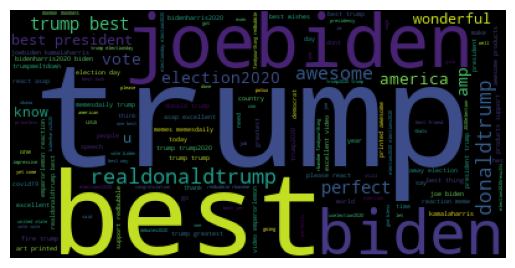

In [34]:
plt.imshow(wordcloud)
plt.axis('off')

In [35]:
total_negative_twits = ' '.join(negative_twits_cleaned['tweet_cleaned'])

In [36]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_twits)

(-0.5, 399.5, 199.5, -0.5)

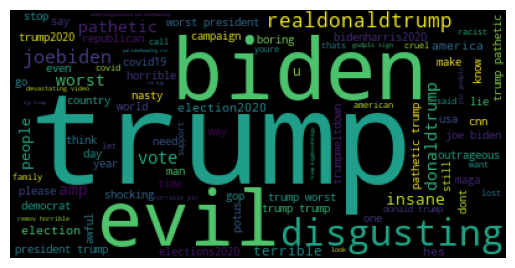

In [37]:
plt.imshow(wordcloud2)
plt.axis('off')

# Emoji Analysis

In [40]:
all_emojis_list = []

for tweet in twitter_df['tweet']:
    for char in tweet:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [41]:
all_emojis_list

['💪',
 '🏽',
 '🤪',
 '🍔',
 '🍔',
 '🍔',
 '🎃',
 '😩',
 '🤚',
 '😬',
 '🤢',
 '👇',
 '👇',
 '👇',
 '👇',
 '🎶',
 '🎶',
 '🎶',
 '👉',
 '🏾',
 '👉',
 '🏾',
 '👉',
 '🏾',
 '👉',
 '🏾',
 '👉',
 '🏾',
 '™',
 '🚨',
 '👇',
 '👇',
 '👇',
 '👇',
 '👇',
 '👇',
 '👇',
 '‼',
 '🚨',
 '‼',
 '👱',
 '🦅',
 '🦅',
 '🧓',
 '🧑',
 '🦳',
 '📸',
 '🎖',
 '👲',
 '🎖',
 '👩',
 '🦯',
 '🧑',
 '🦯',
 '👩',
 '🦽',
 '👨',
 '🦼',
 '👩',
 '🦽',
 '💯',
 '⬇',
 '☠',
 '🤮',
 '👇',
 '👇',
 '👇',
 '👇',
 '👇',
 '👇',
 '👇',
 '🤮',
 '🖕',
 '🏻',
 '👇',
 '👇',
 '👇',
 '👇',
 '👇',
 '👇',
 '👇',
 '🚨',
 '😂',
 '😂',
 '👏',
 '👏',
 '👏',
 '💪',
 '💪',
 '🏽',
 '💀',
 '☠',
 '💀',
 '☠',
 '💀',
 '☠',
 '💀',
 '☠',
 '💀',
 '🤔',
 '🤔',
 '🤔',
 '😳',
 '💀',
 '☠',
 '💀',
 '☠',
 '💀',
 '☠',
 '💀',
 '☠',
 '💀',
 '😎',
 '🥰',
 '😡',
 '😡',
 '😡',
 '🤦',
 '🏻',
 '♀',
 '😳',
 '😆',
 '🙄',
 '🚫',
 '🚫',
 '😷',
 '🤒',
 '👌',
 '💊',
 '😇',
 '‼',
 '🚨',
 '‼',
 '👇',
 '👇',
 '👇',
 '😱',
 '😱',
 '😱',
 '😱',
 '😱',
 '😱',
 '😱',
 '😱',
 '😂',
 '🖤',
 '🖤',
 '🖤',
 '😏',
 '‼',
 '💁',
 '♂',
 '🦠',
 '🦠',
 '🦠',
 '🦠',
 '🦠',
 '🦠',
 '🦠',
 '🤡',
 '🤡',
 '🤡',
 '🤡',
 '🤡',
 '🤡',
 '🤡',
 '🤡'

In [43]:
Counter(all_emojis_list).most_common(10)

[('😂', 35599),
 ('🤣', 24763),
 ('💙', 19378),
 ('🌊', 13040),
 ('❤', 11661),
 ('👏', 11566),
 ('🏻', 11164),
 ('👇', 11069),
 ('🙏', 9169),
 ('🏼', 7341)]

# Feature Engineering

In [24]:
# Create a column for days between 'created_at' and 'user_join_date' to check correlation between likes and age of user account